<a href="https://colab.research.google.com/github/Tanvir007/Deep-Learning-for-Sewage-Treatment-Plant/blob/main/DTP06_Recurrent_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# Load the data from CSV file
data = pd.read_csv('/content/drive/MyDrive/BUET Thesis/DSTP day month year.csv')

In [ ]:
# Select features and target
selected_features = ['day', 'month', 'year','InQuantitySLSMLD','InpH', 'InCOD', 'InBOD', 'InAmmonia', 'InSS', 'InPhosphate', 'InFecalColiform','EfpH','EfCOD','EfBOD','EfAmmonia','EfSS','EfPhosphate','EfFecalColiform'	]

X = data[selected_features]
y = data['EfDischargetoGojariaMLD']

In [ ]:
# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build an RNN model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Reshape the data for RNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


Epoch 1/50
3/3 [==============================] - 18s 759ms/step - loss: 127966.4297 - val_loss: 128862.7109
Epoch 2/50
3/3 [==============================] - 0s 63ms/step - loss: 127811.7500 - val_loss: 128623.7344
Epoch 3/50
3/3 [==============================] - 0s 62ms/step - loss: 127481.9062 - val_loss: 128030.4766
Epoch 4/50
3/3 [==============================] - 0s 71ms/step - loss: 126663.4453 - val_loss: 126700.6328
Epoch 5/50
3/3 [==============================] - 0s 65ms/step - loss: 125189.3516 - val_loss: 125215.2422
Epoch 6/50
3/3 [==============================] - 0s 59ms/step - loss: 123919.6328 - val_loss: 124318.8750
Epoch 7/50
3/3 [==============================] - 0s 64ms/step - loss: 123114.6797 - val_loss: 123645.2656
Epoch 8/50
3/3 [==============================] - 0s 63ms/step - loss: 122471.8359 - val_loss: 123046.5156
Epoch 9/50
3/3 [==============================] - 0s 60ms/step - loss: 121901.5312 - val_loss: 122533.0000
Epoch 10/50
3/3 [==================

In [ ]:
# Evaluation metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print(f"RMSE (Train): {rmse_train}")
print(f"MAE (Train): {mae_train}")
print(f"R2 (Train): {r2_train}")
print(f"RMSE (Test): {rmse_test}")
print(f"MAE (Test): {mae_test}")
print(f"R2 (Test): {r2_test}")

RMSE (Train): 338.5054053710937
MAE (Train): 334.891790409188
R2 (Train): -46.088844269773695
RMSE (Test): 339.895466134049
MAE (Test): 336.02249314377946
R2 (Test): -43.13186555150457


In [ ]:
# Calculate MAPE manually
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for the training set
mape_train = mean_absolute_percentage_error(y_train.values, y_train_pred)

# Calculate MAPE for the test set
mape_test = mean_absolute_percentage_error(y_test.values, y_test_pred)

# Print the MAPE values
print(f"MAPE (Train): {mape_train:.2f}%")
print(f"MAPE (Test): {mape_test:.2f}%")



MAPE (Train): 94.41%
MAPE (Test): 94.43%


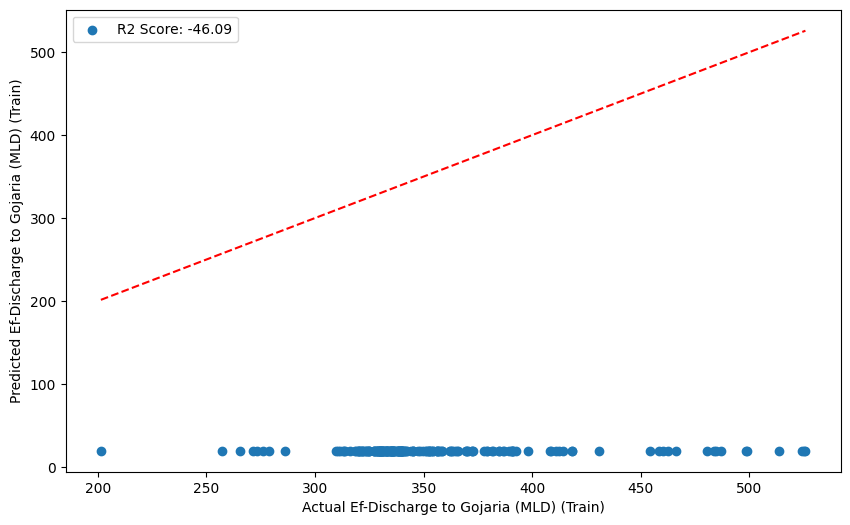

In [ ]:
# Scatter diagram for train set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, label=f'R2 Score: {r2_train:.2f}')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel("Actual Ef-Discharge to Gojaria (MLD) (Train)")
plt.ylabel("Predicted Ef-Discharge to Gojaria (MLD) (Train)")
plt.legend()
plt.show()

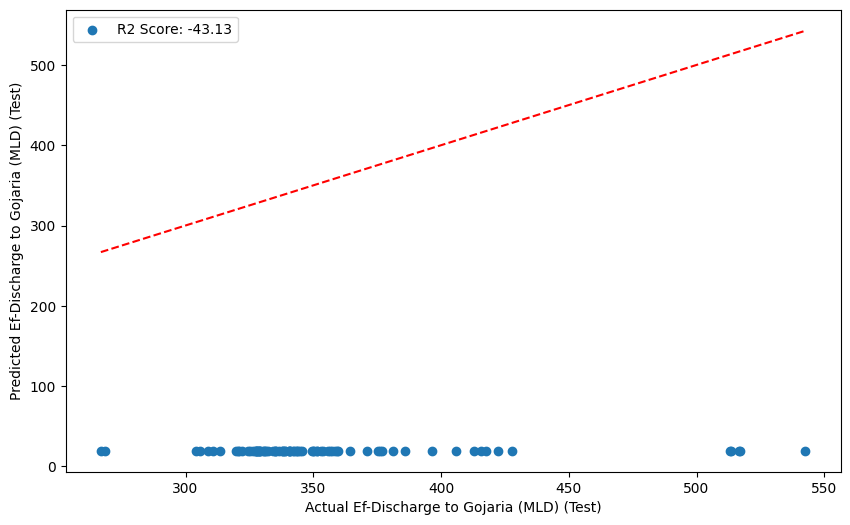

In [ ]:
# Scatter diagram for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, label=f'R2 Score: {r2_test:.2f}')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Ef-Discharge to Gojaria (MLD) (Test)")
plt.ylabel("Predicted Ef-Discharge to Gojaria (MLD) (Test)")
plt.legend()
plt.show()

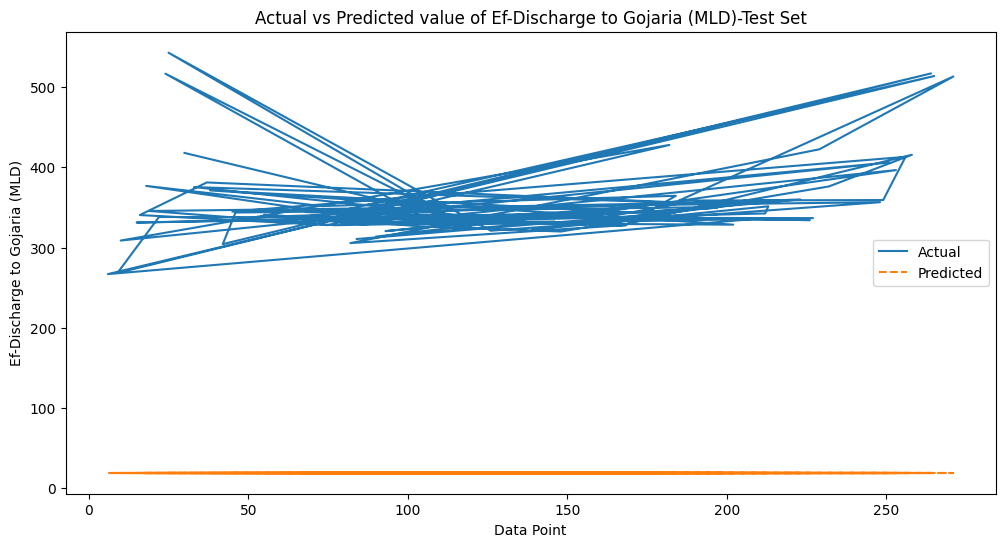

In [ ]:
# Line model diagram
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_test_pred, label='Predicted', linestyle='--')
plt.xlabel("Data Point")
plt.ylabel("Ef-Discharge to Gojaria (MLD)")
plt.legend()
plt.title('Actual vs Predicted value of Ef-Discharge to Gojaria (MLD)-Test Set')
plt.show()

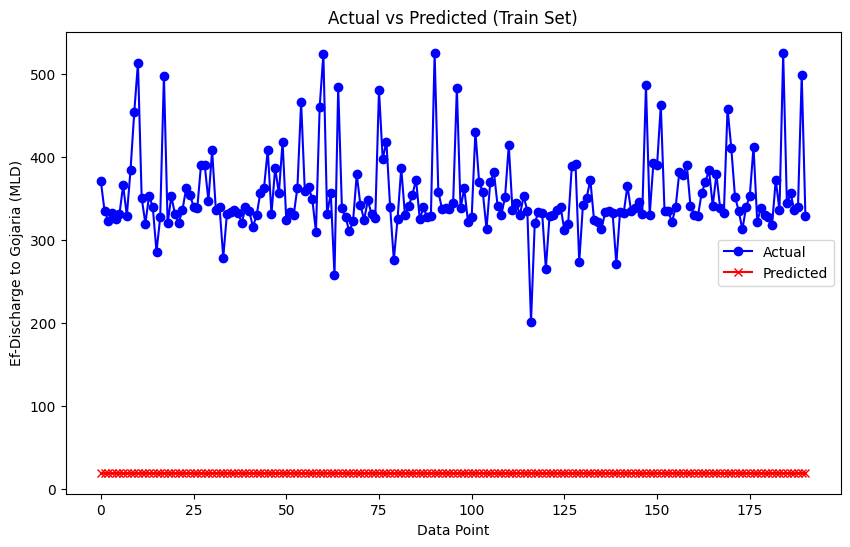

In [ ]:
# Line plot for actual and predicted values (Train Set)
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label="Actual", marker='o', color='blue')
plt.plot(range(len(y_train_pred)), y_train_pred, label="Predicted", marker='x', color='red')
plt.xlabel("Data Point")
plt.ylabel("Ef-Discharge to Gojaria (MLD)")
plt.title("Actual vs Predicted (Train Set)")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
import numpy as np

# Extract target values from the DataFrame
y_train = y_train.values
y_test = y_test.values

# Calculate the regular R-squared for the training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of data points (n) and predictors (k)
n = len(X_train)
k = X_train.shape[1]

# Calculate the residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Calculate the AIC, HQIC, and BIC
def calculate_information_criteria(residuals, n, k, criterion):
    sse = np.sum(residuals**2)
    if criterion == "AIC":
        return 2 * k - 2 * np.log(sse)
    elif criterion == "HQIC":
        return 2 * k - 2 * np.log(sse) + 2 * k * (k + 1) / (n - k - 1)
    elif criterion == "BIC":
        return n * np.log(sse / n) + k * np.log(n)
    else:
        return None

train_aic = calculate_information_criteria(train_residuals, n, k, "AIC")
test_aic = calculate_information_criteria(test_residuals, n, k, "AIC")

train_hqic = calculate_information_criteria(train_residuals, n, k, "HQIC")
test_hqic = calculate_information_criteria(test_residuals, n, k, "HQIC")

train_bic = calculate_information_criteria(train_residuals, n, k, "BIC")
test_bic = calculate_information_criteria(test_residuals, n, k, "BIC")

# Calculate the adjusted R-squared for training and testing sets
adjusted_train_r2 = 1 - (1 - train_r2) * (n - 1) / (n - k - 1)
adjusted_test_r2 = 1 - (1 - test_r2) * (n - 1) / (n - k - 1)

print(f"AIC (Training Set): {train_aic:.4f}")
print(f"AIC (Testing Set): {test_aic:.4f}")
print(f"HQIC (Training Set): {train_hqic:.4f}")
print(f"HQIC (Testing Set): {test_hqic:.4f}")
print(f"BIC (Training Set): {train_bic:.4f}")
print(f"BIC (Testing Set): {test_bic:.4f}")
print(f"Adjusted R-squared (Training Set): {adjusted_train_r2:.4f}")
print(f"Adjusted R-squared (Testing Set): {adjusted_test_r2:.4f}")

AIC (Training Set): -8.3073
AIC (Testing Set): -4.9414
HQIC (Training Set): -4.3305
HQIC (Testing Set): -0.9647
BIC (Training Set): 3322.6994
BIC (Testing Set): 3001.2632
Adjusted R-squared (Training Set): -51.0167
Adjusted R-squared (Testing Set): -47.7503


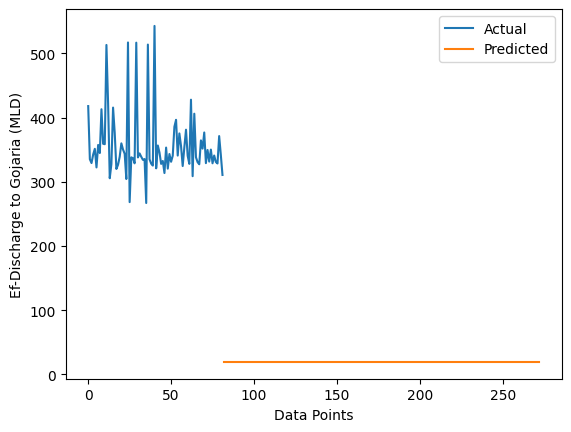

In [ ]:
# Line plot for actual and predicted values
plt.plot(range(len(y_test)), y_test, label="Actual")
plt.plot(range(len(y_test), len(y_test) + len(y_train_pred)), y_train_pred, label="Predicted")
plt.xlabel("Data Points")
plt.ylabel("Ef-Discharge to Gojaria (MLD)")
plt.legend()
plt.show()

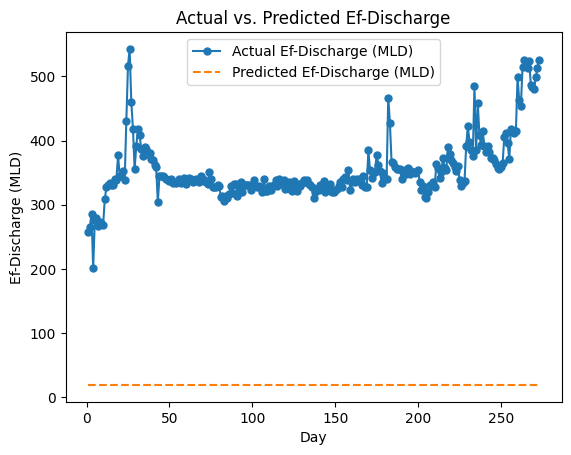

In [ ]:
# Create an array of day numbers for the x-axis
days = np.arange(1, len(data) + 1)

# Create a line plot
plt.plot(days, y, label="Actual Ef-Discharge (MLD)", marker='o', markersize=5)
plt.plot(days, np.concatenate((y_train_pred, y_test_pred)), label="Predicted Ef-Discharge (MLD)", linestyle='--')
plt.xlabel("Day")
plt.ylabel("Ef-Discharge (MLD)")
plt.title("Actual vs. Predicted Ef-Discharge")
plt.legend()
plt.show()